# Report Goal

The goal of this report is to serve as a personal investment tool for evaluating potential stock purchases. Specifically, it aims to track the performance of investments following Trump's Canadian tariff announcements.

Key Objectives:

* Monitor Market Reactions – Assess how stocks respond to the tariff announcements.
* Evaluate Investment Performance – Track price trends of selected stocks over time.
* Identify Opportunities – Determine whether certain stocks present buying or selling opportunities post-announcement.
* Compare Multiple Investments – Analyze different stocks side by side to see which are most affected.


# How to Use

Simply modify the stock ticker symbols below and run the script. Up to three stocks can be tracked.

# Stock Selection

In [1]:
# Declare variables

stock1 = "MNT.TO"
stock2 = "GOLD"
stock3 = "AC"


# Set-up Environment

Installing the packages we require for our review.

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import datetime

import pandas as pd
import matplotlib.pyplot as plt

# Extract Data

Using market data from Yahoo! Finance's API. Closing prices are updated each day.

In [4]:
# Get data stock1
ticker_symbol = stock1

end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365)

stock_data1 =yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
# Get data stock2
ticker_symbol = stock2

end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365)

stock_data2 =yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [6]:
# Get data stock3
ticker_symbol = stock3

end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365)

stock_data3 =yf.download(ticker_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


# Plot Closing Price Results

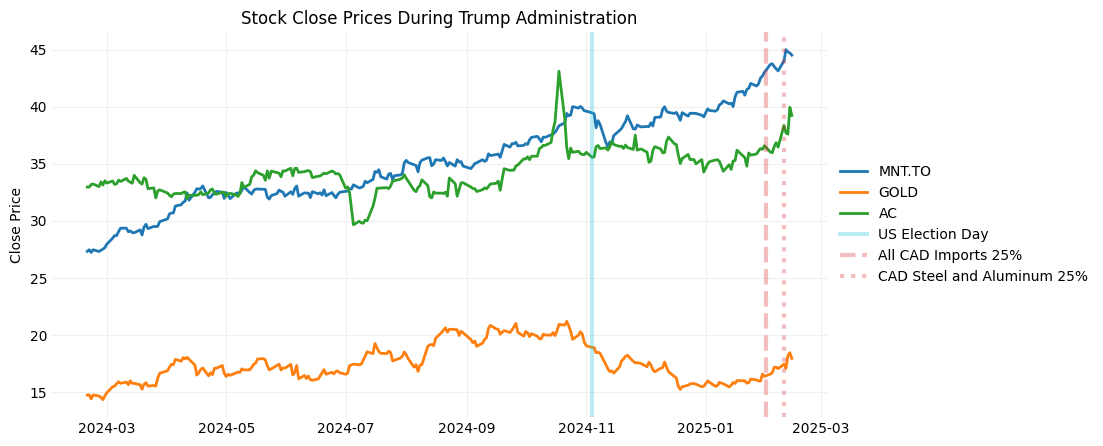

In [7]:
## Stock Chart


plt.figure(figsize=(10,5))


plt.plot(stock_data1.index, stock_data1['Close'], label=stock1, 
         color='#1F77B4', linewidth = 2)
plt.plot(stock_data2.index, stock_data2['Close'], label=stock2, 
         color='#FF7F0E', linewidth = 2)
plt.plot(stock_data3.index, stock_data3['Close'], label=stock3, 
         color='#2CA02C', linewidth = 2)

# Trump Day
plt.axvline(x=pd.to_datetime('2024-11-04'), 
            color='#17BECF', linestyle='-', linewidth = 3, alpha = 0.3, label='US Election Day')

# Tariff 1 Day
plt.axvline(x=pd.to_datetime('2025-02-01'), 
            color='#D62728', linestyle='--', linewidth = 3 ,alpha = 0.3, label='All CAD Imports 25%')

#Steel and aluminum
plt.axvline(x=pd.to_datetime('2025-02-10'), 
            color='#D62728', linestyle=':', linewidth = 3 ,alpha = 0.3, label='CAD Steel and Aluminum 25%')


plt.gca().yaxis.set_label_position('left')
#plt.gca().yaxis.tick_right()
plt.gca().tick_params(axis='both', which='both', length=0)

#plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Prices During Trump Administration')

plt.legend(
    loc="center left", bbox_to_anchor=(1, 0.5),
    fontsize=10,        # Font size
#    title="Legend",     # Title for the legend
    title_fontsize=12,  # Title font size
#    shadow=True,        # Add shadow
    frameon=False,       # Show frame
#    facecolor="lightgray",  # Background color
#    edgecolor="black"       # Border color
)

plt.grid(color='#F0F0F0')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.show()



In [8]:

key_dates = pd.to_datetime(["2024-11-04", "2025-02-10"])

most_recent_date = stock_data1.index.max()


all_dates = key_dates.tolist() + [most_recent_date]

#
closing_prices_df = pd.DataFrame(index=pd.to_datetime(all_dates))

closing_prices_df[stock1] = stock_data1['Close'].loc[stock_data1.index.intersection(closing_prices_df.index)]
closing_prices_df[stock2] = stock_data2['Close'].loc[stock_data2.index.intersection(closing_prices_df.index)]
closing_prices_df[stock3] = stock_data3['Close'].loc[stock_data3.index.intersection(closing_prices_df.index)]

closing_prices_df.index = closing_prices_df.index.strftime("%Y-%m-%d")

print("Stock Closing Prices on Key Dates:")
print(closing_prices_df)


Stock Closing Prices on Key Dates:
               MNT.TO       GOLD         AC
2024-11-04  39.450001  18.900000  35.549999
2025-02-10  44.009998  17.440001  38.349998
2025-02-14  44.509998  17.940001  39.220001
